-Content
- name: The English name of the Pokemon
- type1: The Primary Type of the Pokemon
- type2: The Secondary Type of the Pokemon
- hp: The Base HP of the Pokemon
- attack: The Base Attack of the Pokemon
- defense: The Base Defense of the Pokemon
- sp_attack: The Base Special Attack of the Pokemon
- sp_defense: The Base Special Defense of the Pokemon
- speed: The Base Speed of the Pokemon
- generation: The numbered generation which the Pokemon was first introduced
- Legendary: Denotes if the Pokemon is legendary.

Develop models for following
- Is it possible to build a classifier to identify legendary Pokemon?

In [22]:
import pandas as pd
import numpy as np

In [23]:
df=pd.read_csv('D:/Megha/Desktop/DS assignments/datasets/Pokemon.csv')
df

,number,name,type1,type2,total,hp,attack,defense,sp_attack,sp_defense,speed,generation,legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,Mega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,3,Gigantamax Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1067,896,Glastrier,Ice,NaN,580,100,145,130,65,110,30,8,True
1068,897,Spectrier,Ghost,NaN,580,100,65,60,145,80,130,8,True
1069,898,Calyrex,Psychic,Grass,500,100,80,80,80,80,80,8,True
1070,898,Ice Rider Calyrex,Psychic,Ice,680,100,165,150,85,130,50,8,True


In [24]:
df.dtypes

number         int64
name          object
type1         object
type2         object
total          int64
hp             int64
attack         int64
defense        int64
sp_attack      int64
sp_defense     int64
speed          int64
generation     int64
legendary       bool
dtype: object

In [25]:
df[df.duplicated()]

,number,name,type1,type2,total,hp,attack,defense,sp_attack,sp_defense,speed,generation,legendary


In [26]:
df.isnull().sum()

number          0
name            0
type1           0
type2         498
total           0
hp              0
attack          0
defense         0
sp_attack       0
sp_defense      0
speed           0
generation      0
legendary       0
dtype: int64

In [27]:
#498 pokemon with no secondary typing

In [28]:
df.type1.values

array(['Grass', 'Grass', 'Grass', ..., 'Psychic', 'Psychic', 'Psychic'],
      dtype=object)

C:\Users\Megha\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='type1', ylabel='count'>

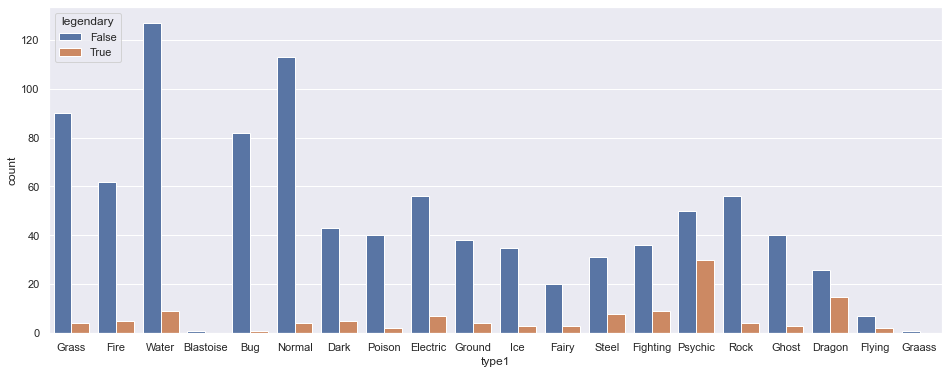

In [29]:
import seaborn as sns
sns.set(rc={'figure.figsize':(16,6)})
sns.countplot(df['type1'],hue=df['legendary'])

In [30]:
df.loc[df['type1']=='Blastoise']

,number,name,type1,type2,total,hp,attack,defense,sp_attack,sp_defense,speed,generation,legendary
15,9,Gigantamax Blasoise,Blastoise,Water,530,79,83,100,85,105,78,1,False


In [31]:
# since blastoise is water type replace type 1 with water

In [32]:
df['type1'] = df['type1'].replace(['Blastoise'],'Water')

In [37]:
df.loc[df['type1']=='Graass']

,number,name,type1,type2,total,hp,attack,defense,sp_attack,sp_defense,speed,generation,legendary
978,830,Eldegoss,Graass,NaN,460,60,50,90,80,120,60,8,False


In [38]:
#typo error for eldegloss typing, correct spelling 

In [39]:
df['type1'] = df['type1'].replace(['Graass'],'Grass')

C:\Users\Megha\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='type1', ylabel='count'>

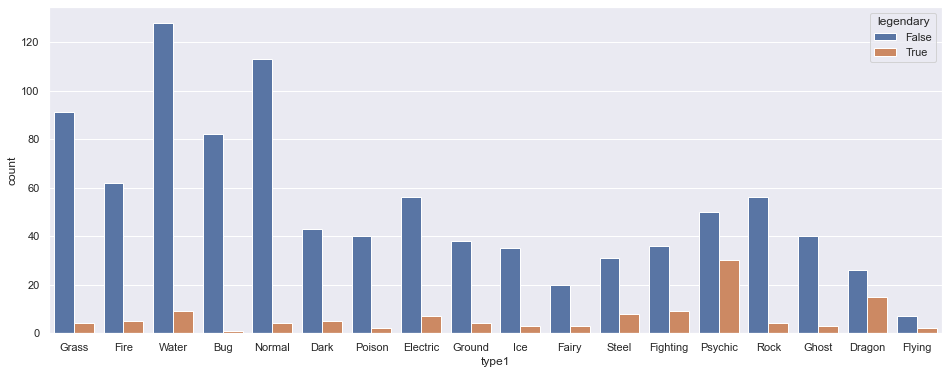

In [40]:
sns.countplot(df['type1'],hue=df['legendary'])

C:\Users\Megha\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='type2', ylabel='count'>

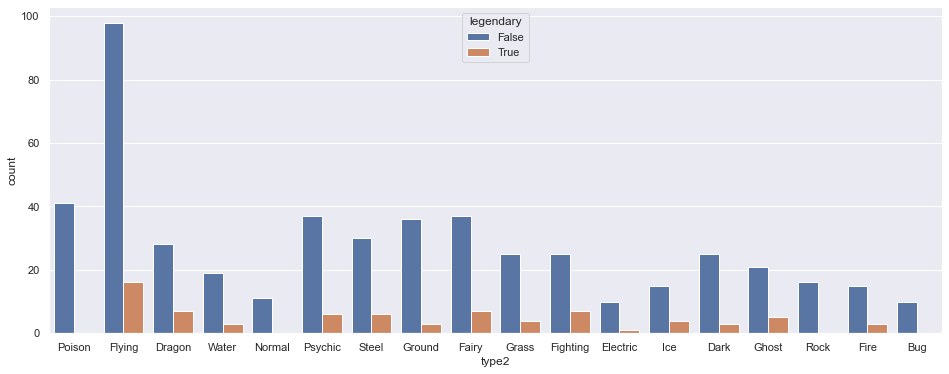

In [41]:
sns.countplot(df['type2'],hue=df['legendary'])

In [42]:
# Most legendaries have primary type as psychic with secondary type as psychic

In [43]:
df.type1.value_counts()

Water       137
Normal      117
Grass        95
Bug          83
Psychic      80
Fire         67
Electric     63
Rock         60
Dark         48
Fighting     45
Ghost        43
Poison       42
Ground       42
Dragon       41
Steel        39
Ice          38
Fairy        23
Flying        9
Name: type1, dtype: int64

In [44]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()
df['type1']=encoder.fit_transform(df.type1)
df

,number,name,type1,type2,total,hp,attack,defense,sp_attack,sp_defense,speed,generation,legendary
0,1,Bulbasaur,9,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,9,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,9,Poison,525,80,82,83,100,100,80,1,False
3,3,Mega Venusaur,9,Poison,625,80,100,123,122,120,80,1,False
4,3,Gigantamax Venusaur,9,Poison,525,80,82,83,100,100,80,1,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1067,896,Glastrier,11,NaN,580,100,145,130,65,110,30,8,True
1068,897,Spectrier,8,NaN,580,100,65,60,145,80,130,8,True
1069,898,Calyrex,14,Grass,500,100,80,80,80,80,80,8,True
1070,898,Ice Rider Calyrex,14,Ice,680,100,165,150,85,130,50,8,True


In [45]:
df.type1.value_counts()

17    137
12    117
9      95
0      83
14     80
6      67
3      63
15     60
1      48
5      45
8      43
13     42
10     42
2      41
16     39
11     38
4      23
7       9
Name: type1, dtype: int64

In [46]:
type1_label_ref=pd.DataFrame({'Type':['Water','Normal','Grass','Bug','Psychic','Fire','Electric','Rock','Dark','Fighting','Ghost','Poison','Ground','Dragon','Steel','Ice','Fairy','Flying'],'label':[17,12,9,0,14,6,3,15,1,5,8,13,10,2,16,11,4,7]})

In [47]:
type1_label_ref

,Type,label
0,Water,17
1,Normal,12
2,Grass,9
3,Bug,0
4,Psychic,14
5,Fire,6
6,Electric,3
7,Rock,15
8,Dark,1
9,Fighting,5


In [48]:
df.type2.value_counts()

Flying      114
Fairy        44
Psychic      43
Poison       41
Ground       39
Steel        36
Dragon       35
Fighting     32
Grass        29
Dark         28
Ghost        26
Water        22
Ice          19
Fire         18
Rock         16
Normal       11
Electric     11
Bug          10
Name: type2, dtype: int64

In [49]:
df['type2']=encoder.fit_transform(df.type2)
df

,number,name,type1,type2,total,hp,attack,defense,sp_attack,sp_defense,speed,generation,legendary
0,1,Bulbasaur,9,13,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,9,13,405,60,62,63,80,80,60,1,False
2,3,Venusaur,9,13,525,80,82,83,100,100,80,1,False
3,3,Mega Venusaur,9,13,625,80,100,123,122,120,80,1,False
4,3,Gigantamax Venusaur,9,13,525,80,82,83,100,100,80,1,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1067,896,Glastrier,11,18,580,100,145,130,65,110,30,8,True
1068,897,Spectrier,8,18,580,100,65,60,145,80,130,8,True
1069,898,Calyrex,14,9,500,100,80,80,80,80,80,8,True
1070,898,Ice Rider Calyrex,14,11,680,100,165,150,85,130,50,8,True


In [50]:
df.type2.value_counts()

18    498
7     114
4      44
14     43
13     41
10     39
16     36
2      35
5      32
9      29
1      28
8      26
17     22
11     19
6      18
15     16
12     11
3      11
0      10
Name: type2, dtype: int64

In [51]:
type2_label_ref=pd.DataFrame({'Type':['Flying','Fairy','Psychic','Poison','Ground','Steel','Dragon','Fighting','Grass','Dark','Ghost','Water','Ice','Fire','Rock','Normal','Electric','Bug','none'],'label':[7,4,14,13,10,16,2,5,9,1,8,17,11,6,15,12,3,0,18]})
type2_label_ref

,Type,label
0,Flying,7
1,Fairy,4
2,Psychic,14
3,Poison,13
4,Ground,10
5,Steel,16
6,Dragon,2
7,Fighting,5
8,Grass,9
9,Dark,1


In [53]:
df.drop('name',axis=1,inplace=True)
df

,number,type1,type2,total,hp,attack,defense,sp_attack,sp_defense,speed,generation,legendary
0,1,9,13,318,45,49,49,65,65,45,1,False
1,2,9,13,405,60,62,63,80,80,60,1,False
2,3,9,13,525,80,82,83,100,100,80,1,False
3,3,9,13,625,80,100,123,122,120,80,1,False
4,3,9,13,525,80,82,83,100,100,80,1,False
...,...,...,...,...,...,...,...,...,...,...,...,...
1067,896,11,18,580,100,145,130,65,110,30,8,True
1068,897,8,18,580,100,65,60,145,80,130,8,True
1069,898,14,9,500,100,80,80,80,80,80,8,True
1070,898,14,11,680,100,165,150,85,130,50,8,True


In [54]:
x=df.iloc[:,0:11]
x

,number,type1,type2,total,hp,attack,defense,sp_attack,sp_defense,speed,generation
0,1,9,13,318,45,49,49,65,65,45,1
1,2,9,13,405,60,62,63,80,80,60,1
2,3,9,13,525,80,82,83,100,100,80,1
3,3,9,13,625,80,100,123,122,120,80,1
4,3,9,13,525,80,82,83,100,100,80,1
...,...,...,...,...,...,...,...,...,...,...,...
1067,896,11,18,580,100,145,130,65,110,30,8
1068,897,8,18,580,100,65,60,145,80,130,8
1069,898,14,9,500,100,80,80,80,80,80,8
1070,898,14,11,680,100,165,150,85,130,50,8


In [55]:
y=df.iloc[:,11:12]
y

,legendary
0,False
1,False
2,False
3,False
4,False
...,...
1067,True
1068,True
1069,True
1070,True


In [57]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=70)

In [58]:
x_train

,number,type1,type2,total,hp,attack,defense,sp_attack,sp_defense,speed,generation
292,230,17,2,540,75,95,95,95,95,85,2
701,590,9,13,294,69,55,45,55,55,15,5
264,207,10,7,430,65,75,105,35,65,85,2
893,755,9,4,285,40,35,55,65,75,15,7
775,656,17,18,314,41,56,40,62,44,71,6
...,...,...,...,...,...,...,...,...,...,...,...
1006,851,6,0,525,100,115,65,90,90,65,8
117,83,5,18,377,52,95,55,58,62,55,8
436,358,14,18,425,65,50,70,95,80,65,3
896,758,13,6,480,68,64,60,111,60,117,7


In [59]:
y_train

,legendary
292,False
701,False
264,False
893,False
775,False
...,...
1006,False
117,False
436,False
896,False


In [60]:
x_test

,number,type1,type2,total,hp,attack,defense,sp_attack,sp_defense,speed,generation
1037,876,14,12,475,70,55,65,95,105,85,8
399,323,6,10,560,70,120,100,145,105,20,3
628,524,15,18,280,55,75,85,25,25,15,5
221,166,0,7,390,55,35,50,55,110,85,2
608,504,12,18,255,45,55,39,35,39,42,5
...,...,...,...,...,...,...,...,...,...,...,...
621,517,14,18,292,76,25,45,67,55,24,5
993,842,9,2,485,110,85,80,100,80,30,8
831,709,8,9,474,85,110,76,65,82,56,6
646,541,0,9,380,55,63,90,50,80,42,5


In [61]:
y_test

,legendary
1037,False
399,False
628,False
221,False
608,False
...,...
621,False
993,False
831,False
646,False


In [65]:
pip install -U imbalanced-learn

Note: you may need to restart the kernel to use updated packages.


In [74]:
from imblearn.over_sampling import SMOTE
sm=SMOTE(random_state=12,k_neighbors=3, sampling_strategy= 1)
sm_x_train,sm_y_train=sm.fit_resample(x_train,y_train)

In [75]:
from sklearn.ensemble import RandomForestClassifier
model=RandomForestClassifier(n_estimators=75,max_depth=5)
model.fit(sm_x_train,sm_y_train)

C:\Users\Megha\AppData\Local\Temp/ipykernel_13744/3102821429.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(sm_x_train,sm_y_train)


RandomForestClassifier(max_depth=5, n_estimators=75)

In [76]:
y_pred=model.predict(sm_x_train)

In [78]:
y_pred

array([False, False, False, ...,  True,  True,  True])

In [79]:
from sklearn.metrics import accuracy_score

In [80]:
accuracy_score(y_pred,sm_y_train)

0.9752252252252253

In [81]:
y_pred_test=model.predict(x_test)

In [82]:
accuracy_score(y_pred_test,y_test)

0.9503105590062112

In [85]:
model.feature_importances_

array([0.0714062 , 0.01054262, 0.0052664 , 0.43139544, 0.1045745 ,
       0.04049419, 0.05964607, 0.09695489, 0.06752234, 0.09028437,
       0.02191298])

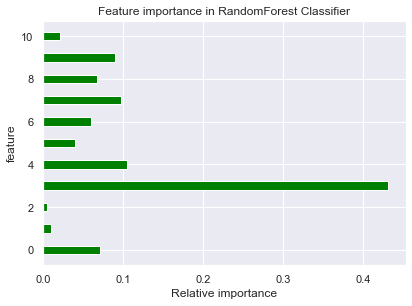

<Figure size 360x360 with 0 Axes>

In [90]:
import matplotlib.pyplot as plt
y_ = model.feature_importances_
fig, ax = plt.subplots() 
width = 0.4 # the width of the bars 
ind = np.arange(len(y_)) # the x locations for the groups
ax.barh(ind, y_, width, color='green')
plt.title('Feature importance in RandomForest Classifier')
plt.xlabel('Relative importance')
plt.ylabel('feature') 
plt.figure(figsize=(5,5))
fig.set_size_inches(6.5, 4.5, forward=True)

In [104]:
# total stat is the deciding fatcor for classifying legendaries; legendaries have higher total stats

TypeError: 'module' object does not support item assignment

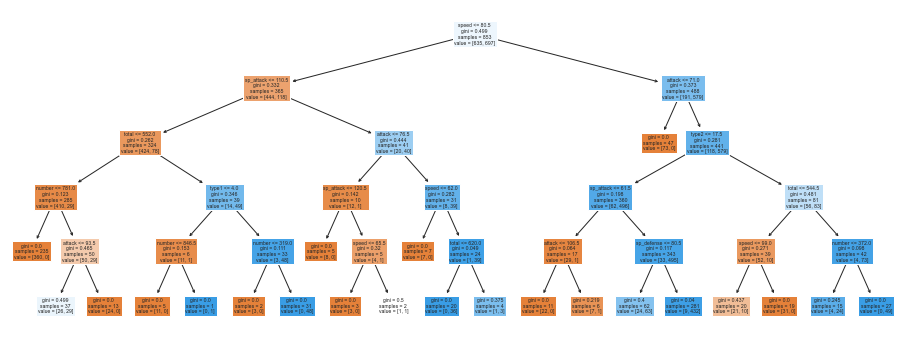

In [110]:
from sklearn import tree

from matplotlib import pyplot as pl

tree[0]= tree.plot_tree(model.estimators_[0], feature_names=x_train.columns, filled=True)